#**The Sparks Foundation**
#Data Science and Buisness Analytics intern

#Abdallah Fekry Mohammed
#Task2
#Prediction using Unsupervised Learning (KMeans)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
df = pd.read_csv('Iris.csv')
print(df.shape)
df.head()

(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
df.Species=df.Species.astype('category').cat.codes
print("Classes:",df.Species.unique())
df.head()

Classes: [0 1 2]


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [15]:
df.Species.unique()

array([0, 1, 2], dtype=int8)

In [16]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [17]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values
print("x shape:",x.shape,"\ny shape:",y.shape,sep='\n')

x shape:
(150, 4)

y shape:
(150,)


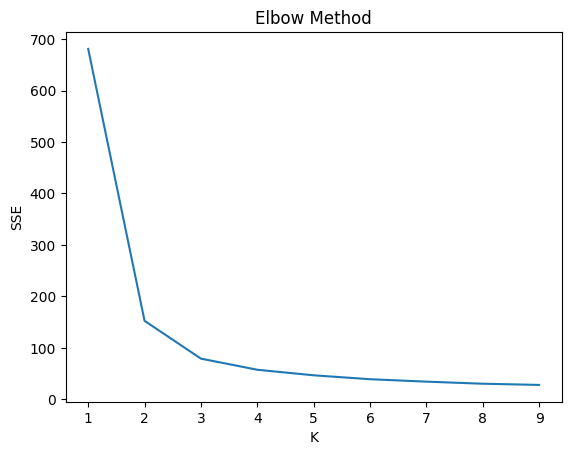

In [18]:
sse = []
for i in range(1,10):
  model = KMeans(n_clusters=i,n_init=10)
  model.fit(x)
  sse.append(model.inertia_)

plt.title("Elbow Method")
plt.xlabel("K")
plt.ylabel("SSE")
plt.plot(range(1,10),sse)

In [19]:
model = KMeans(n_clusters=3, random_state=42)
ykm = model.fit_predict(x)
ykm

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

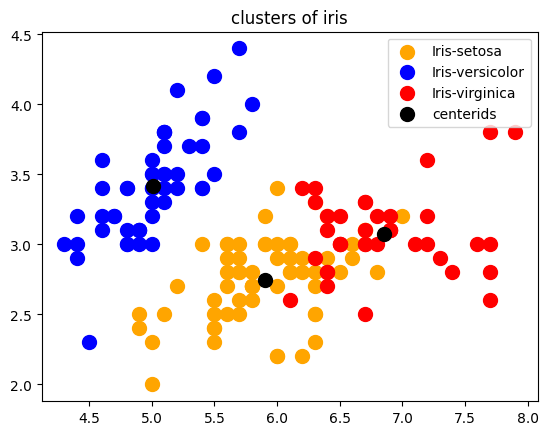

In [20]:
plt.scatter(x[ykm==0,0],x[ykm==0,1],s=100,c='orange',label='Iris-setosa')
plt.scatter(x[ykm==1,0],x[ykm==1,1],s=100,c='blue',label='Iris-versicolor')
plt.scatter(x[ykm==2,0],x[ykm==2,1],s=100,c='r',label='Iris-virginica')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=100,c='black',label='centerids')
plt.title('clusters of iris')
plt.legend()
plt.show()